* National Taiwan University, 國立臺灣大學
* YANG YU HSIANG, 楊宇翔

## 最小平方法迴歸
迴歸分析建構自變數與依變數的解釋模型。依變數是被解釋變數，通常是我們關心的某個社會現象，自變數則是用來解釋依變數的變數。

 $y=f(x)+e $
    
 $y=b_{0}+b_{1}x_{1}+b_{2}x_{2}+...+e$
    
  * $y 為依變數$
   
  * $x_{1}, x_{2}, x_{3} ...為自變數$
   
  * $b_{0}為常數項$$
   
  * $b_{1}, b_{2}, b_{3} ...為係數$
   
  * $e=y-f(x) 誤差$
   
誤差為實際值減去預測值為誤差。
其值為正代表低估，其值為負代表高估。
    
1. 依變數是自變數的函數，由自變數可以預測依變數，迴歸的趨勢線即為預測值。
2. 係數表示自變數與依變數的關係，其值不等於零，代表顯著（有影響力），其值為正代表正相關，負代表負相關。當x 變化一個單位，y 變化 b 個單位。
3.  $R^{2}$ 為可解釋的百分比，e 愈大，$R^{2}$ 愈小。
4. 係數是否為 0，由t 檢定決定，$H_{0}$（虛無假設）為係數為零，不相關，如果拒絕 $H_{0}$，代表相關。拒絕與否，由 p-value 決定，它代表 $H_{0}$ 犯錯的機率，如果小於0.05 接受$H_{0}$，拒絕$H_{1}$（對立假設）。
5. 由最小平方法估計迴歸的係數。係數要不偏、有效，前提是誤差必須是雜訊， i.i.d. (Independent and identically distributed random variables) 亦即各自獨立，彼此不相關，無異值性，常態分佈。
6. 解釋變數為研究者最關心的自變數，用來解釋依變數，通常有理論的意義。但是要假定其他條件一樣，這要借助其他自變數的控制，才能確定解釋變數與被解釋變數純粹的關係。
7. 自變數愈多，可解釋百分比愈高，但模型愈複雜，這兩者要取捨。
8. 自變數改變，其係數也會跟著變，遺漏重要的自變數，影響係數的不偏性與有效性。
9. 不偏性指多估計幾次，其平均值為正確值，有效性指在所有不偏估計量中，標準差最小者。
10. 虛擬變數與交互作用開拓迴歸分析的視野，宜多加應用。


* 官方網站:
https://pysal.org/spreg/index.html

# 安裝 geopandas

In [1]:
! pip install geopandas

In [2]:
# 繪圖的補充包
! pip uninstall rtree
! sudo apt install libspatialindex-dev
! pip install rtree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-c6 amd64 1.9.3-2 [55.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-dev amd64 1.9.3-2 [16.0 kB]
Fetched 319 kB in 1s (280 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <

In [3]:
# 安裝 mapclassify
! pip install mapclassify

In [4]:
! pip install libpysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.1 MB/s eta 0:00:00


In [5]:
! pip install spreg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 6.9 MB/s eta 0:00:00


In [6]:
! pip install esda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 2.3 MB/s eta 0:00:00


In [7]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import numpy as np
import libpysal
import seaborn as sns
# from libpysal.examples import load_example
# from libpysal.weights import Queen
from spreg import ML_Lag, OLS, ML_Error
import libpysal as lps
import esda

In [ ]:
# from matplotlib import rcParams
# rcParams["font.sans-serif"] = ["kaiu"]
# rcParams["font.family"] ="DFKai-sb"

In [8]:
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-06-27 07:35:16--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.199.100, 74.125.199.113, 74.125.199.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.199.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-06-27 07:35:16--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.99.132, 2607:f8b0:400e:c0c::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.99.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M   117MB/s    in 0.2s    

2024-06-27 07:35:

# 與 google drive 連線

In [9]:
import os
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# 設定 path

In [10]:
path="/content/drive/MyDrive/"      # 分享資料讀取
pth="/content/drive/MyDrive/"

# 讀取資料


In [11]:
import pandas as pd
fname="data/covid19_data_month.xlsx"
df=pd.read_excel(path+fname)
df

,Unnamed: 0,CountryName,iso_a3,region2,continent,C1,C2,C3,C4,C5,...,egaldem,libdem,partipdem,polyarchy,year,death_p,case_p,case_incp,death_incp,ym
0,0,Afghanistan,AFG,Southern Asia,Asia,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.142,0.192,0.151,0.366,2020.0,0.000000,0.000000,0.000000e+00,0.000000e+00,202001
1,1,Afghanistan,AFG,Southern Asia,Asia,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.142,0.192,0.151,0.366,2020.0,0.000000,0.000003,4.638222e-07,0.000000e+00,202002
2,2,Afghanistan,AFG,Southern Asia,Asia,1.741935,0.645161,1.725806,0.000000,0.193548,...,0.142,0.192,0.151,0.366,2020.0,0.000002,0.000099,1.397152e-05,3.471186e-07,202003
3,3,Afghanistan,AFG,Southern Asia,Asia,3.000000,2.500000,2.000000,3.466667,1.500000,...,0.142,0.192,0.151,0.366,2020.0,0.000073,0.002255,1.489457e-04,5.021649e-06,202004
4,4,Afghanistan,AFG,Southern Asia,Asia,3.000000,2.500000,2.000000,4.000000,1.500000,...,0.142,0.192,0.151,0.366,2020.0,0.000427,0.019328,1.158769e-03,1.683525e-05,202005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,5418,Zimbabwe,ZWE,Eastern Africa,Africa,0.000000,0.290323,1.290323,2.967742,1.000000,...,0.173,0.192,0.193,0.288,2020.0,0.036159,1.555909,3.665695e-03,7.461860e-05,202201
5419,5419,Zimbabwe,ZWE,Eastern Africa,Africa,0.000000,1.000000,2.000000,2.000000,1.000000,...,0.173,0.192,0.193,0.288,2020.0,0.037230,1.609199,1.660679e-03,1.409870e-05,202202
5420,5420,Zimbabwe,ZWE,Eastern Africa,Africa,0.645161,2.000000,1.000000,3.000000,0.000000,...,0.173,0.192,0.193,0.288,2020.0,0.037522,1.680934,2.213089e-03,1.094704e-05,202203
5421,5421,Zimbabwe,ZWE,Eastern Africa,Africa,2.000000,2.000000,1.000000,3.000000,0.000000,...,0.173,0.192,0.193,0.288,2020.0,0.037820,1.711987,3.668301e-04,5.771399e-06,202204


# 如果選取多個年月，整併資料

In [12]:
# 選擇時間起迄
################
start = 202201
end = 202203
################
df = df[(df.ym >= start) & (df.ym <= end)]
countryname = df.CountryName.unique() #取得資料框 df 中所有唯一的國家名稱，並將它們存入變數 countryname。
columns = [] #初始化了兩個空列表 columns 和 data，分別用來存放列名稱和數據。
data = []

for k in df.columns:
    if not k.startswith('Unnamed'): #這行檢查列名稱是否以 'Unnamed' 開頭，若不是，則繼續執行以下的程式碼。
        v_country = []
        for n in range(len(countryname)):
            df_tem = df[df.CountryName == countryname[n]]
            try:  # 如果是連續變數
                v = df_tem[k].mean()
                v_country.append(v)
            except:  # 如果是字串變數
                v = df_tem[k].iloc[0]
                v_country.append(v)
        columns.append(k)
        data.append(v_country)

result_df = pd.DataFrame(data).T
result_df.columns = columns
result_df['CountryName'] = countryname
result_df = result_df.set_index('CountryName')
result_df


,iso_a3,region2,continent,C1,C2,C3,C4,C5,C6,C7,...,egaldem,libdem,partipdem,polyarchy,year,death_p,case_p,case_incp,death_incp,ym
CountryName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,Southern Asia,Asia,0.0,1.5,0.5,0.0,0.870968,0.0,0.0,...,0.142,0.192,0.151,0.366,2020.0,0.020203,0.453354,0.000602,0.00001,202202.0
Albania,ALB,Southern Europe,Europe,1.0,0.908602,1.0,3.0,0.483871,0.849462,1.569892,...,0.372,0.403,0.316,0.501,2020.0,0.118304,8.991133,0.024327,0.000108,202202.0
Algeria,DZA,Northern Africa,Africa,1.377112,1.956989,2.0,4.0,0.946237,0.0,0.0,...,0.251,0.147,0.111,0.277,2020.0,0.015801,0.597653,0.001238,0.000016,202202.0
Andorra,AND,Southern Europe,Europe,0.5,1.043011,0.5,1.844086,0.053763,0.053763,0.053763,...,0.372,0.403,0.316,0.501,2020.0,0.118304,8.991133,0.024327,0.000108,202202.0
Angola,AGO,Middle Africa,Africa,0.0,2.741935,1.416667,2.397849,0.416667,1.583333,2.0,...,0.147,0.212,0.104,0.346,2020.0,0.006111,0.313876,0.000616,0.000005,202202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,VEN,South America,South America,1.0,0.0,0.0,0.0,1.0,0.0,0.172043,...,0.144,0.073,0.153,0.209,2020.0,0.01916,1.710861,0.002937,0.000014,202202.0
Vietnam,VNM,South-Eastern Asia,Asia,1.75,1.5,1.5,3.0,1.379032,1.379032,1.5,...,0.229,0.107,0.182,0.218,2020.0,0.040498,3.98142,0.089569,0.000117,202202.0
Yemen,YEM,Western Asia,Asia,1.0,1.0,1.0,0.0,0.0,1.5,0.0,...,0.028,0.037,0.065,0.111,2020.0,0.00728,0.039511,0.000066,0.000006,202202.0


In [13]:
df.columns

Index(['Unnamed: 0', 'CountryName', 'iso_a3', 'region2', 'continent', 'C1',
       'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'E1', 'E2', 'H1', 'H2', 'H3',
       'H6', 'H7', 'H8', 'V1', 'V2', 'V3', 'V4', 'case', 'death', 'String',
       'Govern', 'Contain', 'Economic', 'date', 'area', 'cate', 'demo',
       'eco_dev', 'edu', 'ferti', 'gdp_c', 'life', 'popu', 'delibdem',
       'egaldem', 'libdem', 'partipdem', 'polyarchy', 'year', 'death_p',
       'case_p', 'case_incp', 'death_incp', 'ym'],
      dtype='object')

## 各國的地圖資料

In [14]:
# 讀取 shape 檔，國家
################################
fname=path+"shape/countries.shp"
################################
world= gpd.read_file(fname)
# 字串改為數字欄位
col=world.columns
for c in col:
  try:
    world[c]=world[c].astype(float)
  except:
    pass

In [15]:
world=world[['iso_a3','geometry']]
world

,iso_a3,geometry
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...
172,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,XKS,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


## 合併地圖與資料

In [16]:
# df 匯入 world
world= world.merge(df, on='iso_a3', how='left')
world

,iso_a3,geometry,Unnamed: 0,CountryName,region2,continent,C1,C2,C3,C4,...,egaldem,libdem,partipdem,polyarchy,year,death_p,case_p,case_incp,death_incp,ym
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1706.0,Fiji,Oceania,Oceania,2.741935,3.000000,2.00000,3.000000,...,0.320,0.279,0.197,0.418,2020.0,0.084051,6.686902,0.034771,3.760775e-04,202201.0
1,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1707.0,Fiji,Oceania,Oceania,0.928571,3.000000,2.00000,0.642857,...,0.320,0.279,0.197,0.418,2020.0,0.092823,7.186471,0.004346,1.334006e-04,202202.0
2,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1708.0,Fiji,Oceania,Oceania,0.000000,2.419355,2.00000,0.000000,...,0.320,0.279,0.197,0.418,2020.0,0.094399,7.264338,0.001731,0.000000e+00,202203.0
3,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",4780.0,Tanzania,Eastern Africa,Africa,0.000000,0.000000,0.00000,0.000000,...,0.330,0.327,0.233,0.409,2020.0,0.001334,0.055668,0.000225,2.978460e-06,202201.0
4,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",4781.0,Tanzania,Eastern Africa,Africa,0.000000,0.000000,0.00000,0.000000,...,0.330,0.327,0.233,0.409,2020.0,0.001409,0.059397,0.000025,5.707351e-07,202202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",4926.0,Trinidad and Tobago,Caribbean,South America,2.000000,2.000000,2.00000,3.285714,...,0.609,0.643,0.484,0.755,2020.0,0.253862,8.668234,0.041674,5.755984e-04,202202.0
499,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",4927.0,Trinidad and Tobago,Caribbean,South America,2.000000,2.000000,2.00000,3.193548,...,0.609,0.643,0.484,0.755,2020.0,0.265824,9.610056,0.023425,2.831573e-04,202203.0
500,SSD,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",4490.0,South Sudan,Eastern Africa,Africa,0.935484,0.612903,0.16129,0.258065,...,0.042,0.070,0.085,0.191,2020.0,0.001242,0.148878,0.000456,5.877970e-07,202201.0
501,SSD,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",4491.0,South Sudan,Eastern Africa,Africa,1.000000,0.000000,1.00000,0.000000,...,0.042,0.070,0.085,0.191,2020.0,0.001248,0.153899,0.000058,0.000000e+00,202202.0


## 選取欄位

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
world.columns

Index(['iso_a3', 'geometry', 'Unnamed: 0', 'CountryName', 'region2',
       'continent', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'E1', 'E2',
       'H1', 'H2', 'H3', 'H6', 'H7', 'H8', 'V1', 'V2', 'V3', 'V4', 'case',
       'death', 'String', 'Govern', 'Contain', 'Economic', 'date', 'area',
       'cate', 'demo', 'eco_dev', 'edu', 'ferti', 'gdp_c', 'life', 'popu',
       'delibdem', 'egaldem', 'libdem', 'partipdem', 'polyarchy', 'year',
       'death_p', 'case_p', 'case_incp', 'death_incp', 'ym'],
      dtype='object')

In [18]:
print(df.columns.tolist())

['Unnamed: 0', 'CountryName', 'iso_a3', 'region2', 'continent', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'E1', 'E2', 'H1', 'H2', 'H3', 'H6', 'H7', 'H8', 'V1', 'V2', 'V3', 'V4', 'case', 'death', 'String', 'Govern', 'Contain', 'Economic', 'date', 'area', 'cate', 'demo', 'eco_dev', 'edu', 'ferti', 'gdp_c', 'life', 'popu', 'delibdem', 'egaldem', 'libdem', 'partipdem', 'polyarchy', 'year', 'death_p', 'case_p', 'case_incp', 'death_incp', 'ym']


In [19]:
sel = ['iso_a3', 'geometry', 'CountryName', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'E1', 'E2', 'H1', 'H2', 'H3', 'H6', 'H7', 'H8', 'V1', 'V2', 'V3', 'V4',
       'case', 'death', 'String', 'Govern', 'Contain', 'Economic', 'area', 'cate',
       'demo', 'eco_dev', 'edu', 'ferti', 'gdp_c', 'life', 'popu', 'region2', 'region2',
       'delibdem', 'egaldem', 'libdem', 'partipdem', 'death_p', 'case_p',
       'case_incp', 'death_incp', 'ym', 'continent']
gdf = world[sel]


## 有許多無值


In [20]:
# 針對特定欄位，無值則刪除
gdf.dropna(axis=0, how='any', subset=['case','death_p','case_p','demo','gdp_c','C1'], inplace=True)
gdf.index=range(len(gdf))
print (len(gdf))

489


<ipython-input-20-92e43595a53f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf.dropna(axis=0, how='any', subset=['case','death_p','case_p','demo','gdp_c','C1'], inplace=True)


In [21]:
# 簡化檔名，存成shape 檔欄位最名十個字元
gdf.columns=['iso_a3', 'geometry', 'Country', 'C1_combined',
       'C2_combined', 'C3_combined', 'C4_combined',
       'C5_combined', 'C6_combined', 'C7_combined',
       'C8_combined', 'E1_combined', 'E2_combined',
       'H1_combined', 'H2_combined', 'H3_combined',
       'H6_combined', 'H7_combined', 'H8_combined',
       'V1_combined', 'V2_combined', 'V3_combined',
       'V4_combined', 'Cases', 'Deaths',
       'Stringency',
        'Govern',
        'Contain',
        'Eco_Sup',
        'area', 'cate', 'demo', 'eco_dev',
       'edu', 'ferti', 'gdp_c', 'life', 'popu', 'region', 'region2',
       'delibdem', 'egaldem', 'libdem', 'partipdem',
       'death_p', 'case_p', 'case_incp', 'death_incp',
       'ym', 'continent']

In [ ]:
gdf.plot()

## 存檔與讀檔
* 經過存檔與讀檔，過濾掉一些雜訊。
* 可存為 shape 或 excel 檔。但要注意後者會去除地理資訊。

In [22]:
# save shp 保留地理屬性 geometry
fname="shape/covid_data_202203.shp"

# Convert datetime columns to string type
for col in gdf.select_dtypes(include=['datetime']).columns:
    gdf[col] = gdf[col].astype(str)

gdf.to_file(pth+fname)

<ipython-input-22-a8b8b88853fa>:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(pth+fname)


### save

In [23]:
# save shp 保留地理屬性 geometry
fname="shape/covid_data_202203.shp"
gdf.to_file(pth+fname)

<ipython-input-23-d59db5dc8ccb>:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(pth+fname)


### read 直接讀取

<Axes: >

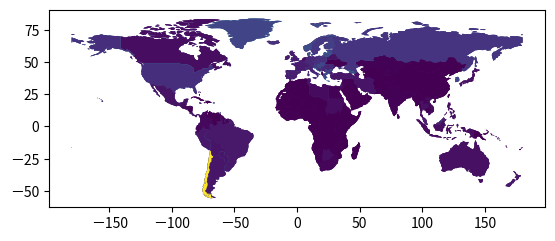

In [24]:
############################################
fname="shape/covid_data_202203.shp"
gdf = gpd.read_file(pth+fname)
# 數字欄位 astype(float)
col=gdf.columns
for c in col:
  try:
    gdf[c]=gdf[c].astype(float)
  except:
    pass
gdf.plot('death_incp')

In [25]:
gdf.columns

Index(['iso_a3', 'Country', 'C1_combine', 'C2_combine', 'C3_combine',
       'C4_combine', 'C5_combine', 'C6_combine', 'C7_combine', 'C8_combine',
       'E1_combine', 'E2_combine', 'H1_combine', 'H2_combine', 'H3_combine',
       'H6_combine', 'H7_combine', 'H8_combine', 'V1_combine', 'V2_combine',
       'V3_combine', 'V4_combine', 'Cases', 'Deaths', 'Stringency', 'Govern',
       'Contain', 'Eco_Sup', 'area', 'cate', 'demo', 'eco_dev', 'edu', 'ferti',
       'gdp_c', 'life', 'popu', 'region', 'region2', 'delibdem', 'egaldem',
       'libdem', 'partipdem', 'death_p', 'case_p', 'case_incp', 'death_incp',
       'ym', 'continent', 'geometry'],
      dtype='object')

## 主題圖

In [26]:
def plot_poly_map(gdf,variable, title, scheme='QUANTILES', k=10, color='OrRd', edgecolor='gray', linewidth=1,figsize=(20, 10), missing=False, fmt=0):
    fmt=["{:.1e}","{:.1f}","{:.2f}","{:.3f}","{:.4f}"][fmt]
    if missing==False:
        gdf.plot(column=variable,figsize=figsize,scheme=scheme, k=k, edgecolor=edgecolor,linewidth=linewidth, \
                    cmap=color, legend=True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5), 'fmt':fmt})
    if missing==True:
        gdf.plot(column=variable,figsize=figsize,scheme=scheme, k=k, edgecolor=edgecolor, linewidth=linewidth,
                    cmap=color, legend=True,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5), 'fmt':fmt},
                    missing_kwds={'color': 'lightgrey', "edgecolor": "gray", "hatch": "///","label": "Missing values"})
    plt.savefig(pth+ title+".png")
    plt.show()

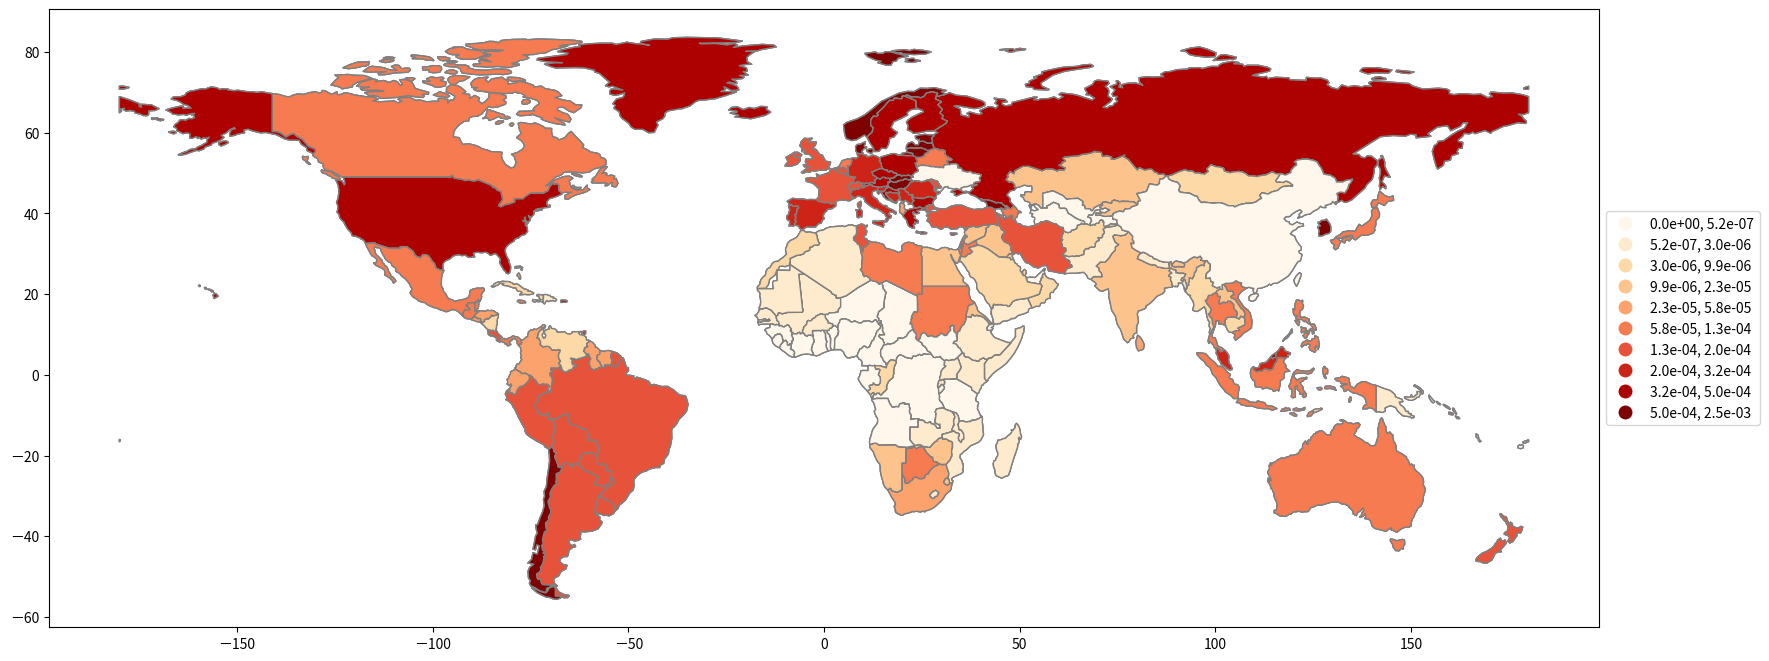

In [27]:
#######################
variable='death_incp'
title=variable+'2022'
#######################
plot_poly_map(gdf, variable, title)

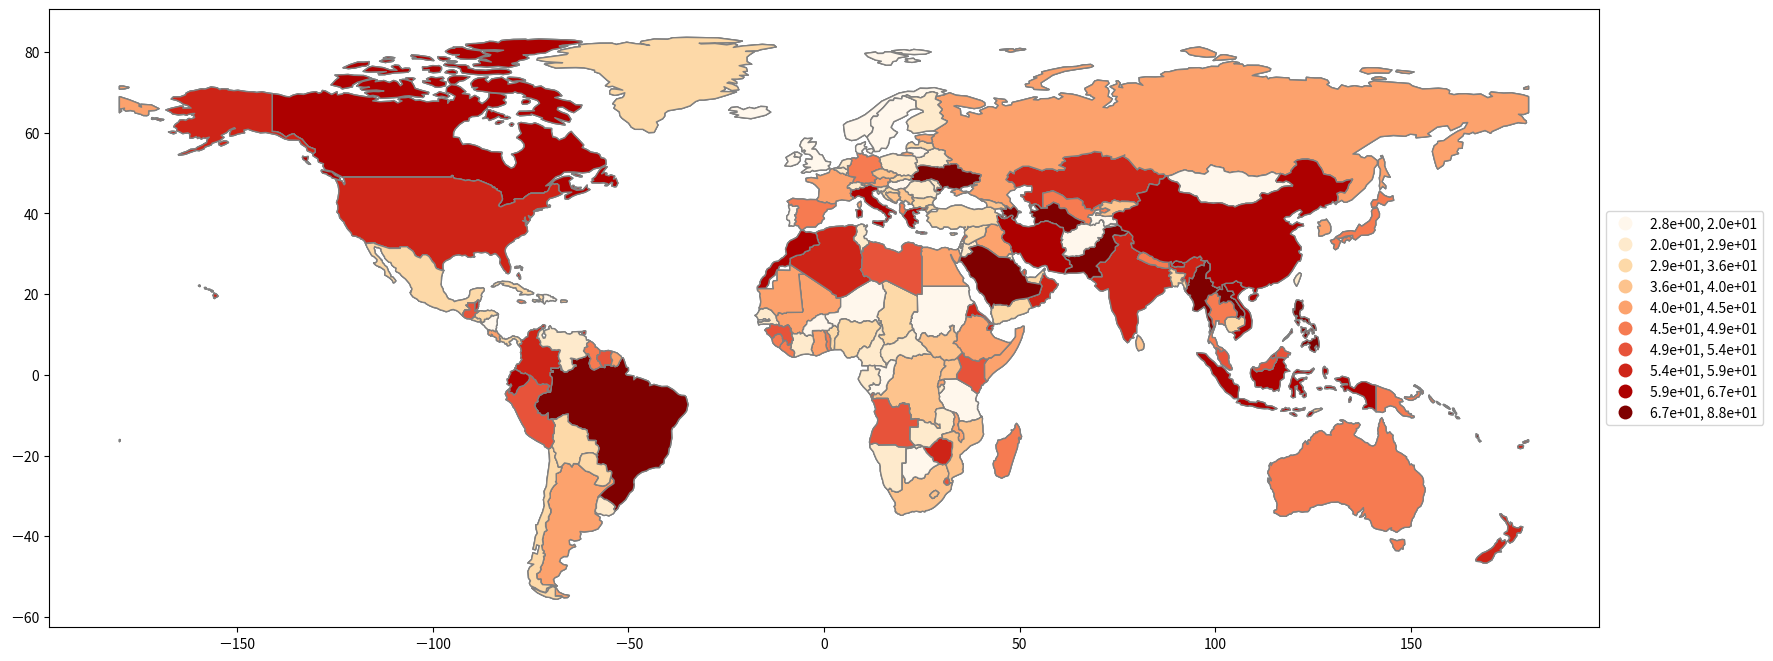

In [28]:
############################
variable='Stringency'
title=variable+'2022'
############################
plot_poly_map(gdf, variable, title)

# 描述統計

In [29]:
gdf.columns

Index(['iso_a3', 'Country', 'C1_combine', 'C2_combine', 'C3_combine',
       'C4_combine', 'C5_combine', 'C6_combine', 'C7_combine', 'C8_combine',
       'E1_combine', 'E2_combine', 'H1_combine', 'H2_combine', 'H3_combine',
       'H6_combine', 'H7_combine', 'H8_combine', 'V1_combine', 'V2_combine',
       'V3_combine', 'V4_combine', 'Cases', 'Deaths', 'Stringency', 'Govern',
       'Contain', 'Eco_Sup', 'area', 'cate', 'demo', 'eco_dev', 'edu', 'ferti',
       'gdp_c', 'life', 'popu', 'region', 'region2', 'delibdem', 'egaldem',
       'libdem', 'partipdem', 'death_p', 'case_p', 'case_incp', 'death_incp',
       'ym', 'continent', 'geometry'],
      dtype='object')

In [30]:
gdf.describe()

,C1_combine,C2_combine,C3_combine,C4_combine,C5_combine,C6_combine,C7_combine,C8_combine,E1_combine,E2_combine,H1_combine,H2_combine,H3_combine,H6_combine,H7_combine,H8_combine,V1_combine,V2_combine,V3_combine,V4_combine,Cases,Deaths,Stringency,Govern,Contain,Eco_Sup,area,cate,demo,eco_dev,edu,ferti,gdp_c,life,popu,delibdem,egaldem,libdem,partipdem,death_p,case_p,case_incp,death_incp,ym
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,4.890000e+02,489.000000,489.000000,489.000000,489.000000,489.000000,4.890000e+02,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,4.890000e+02,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,0.910049,1.255349,1.205899,2.092470,0.432701,0.566357,0.533233,2.096515,0.522597,0.591037,1.908237,2.524995,1.102768,2.757917,4.763483,0.844297,600.634371,24485.117228,24483.406957,24793.652916,2.448902e+06,35463.130201,44.419018,49.193132,52.245587,27.840871,8.162474e+05,1.895706,0.414312,0.029571,7.966939,2.707669,19026.054724,73.204540,4.727544e+07,0.405429,0.393086,0.409147,0.339945,0.107318,9.329101,0.062355,0.000172,202202.000000
std,0.766462,0.787339,0.704599,1.455337,0.605940,0.694448,0.737128,1.031100,0.664702,0.794077,0.302942,0.723288,0.782741,0.852928,0.697750,0.890673,2575.128651,5552.733314,5552.685470,5345.236855,7.464634e+06,104743.526678,17.214491,13.479805,13.693834,32.011093,2.033641e+06,0.804293,0.236649,0.119576,3.150912,1.300323,20163.838696,7.061456,1.557659e+08,0.248748,0.238282,0.261875,0.197331,0.120746,10.696932,0.107962,0.000253,0.817333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-2.000000,-2.000000,-2.000000,7.000000e+00,1.000000,2.780000,15.664516,17.904194,0.000000,4.489460e+02,1.000000,0.048200,-0.170000,1.310000,0.980000,623.490000,52.400000,2.866410e+05,0.024000,0.028000,0.012000,0.010000,0.000163,0.002392,0.000000,0.000000,202201.000000
25%,0.000000,1.000000,0.967742,0.625000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.258065,2.000000,5.000000,0.000000,-3.000000,22123.580645,22123.580645,22435.000000,6.349125e+04,971.785714,32.436774,40.100000,43.910645,0.000000,6.646836e+04,1.000000,0.199800,0.010000,5.700000,1.670000,5041.640000,68.100000,4.885500e+06,0.207000,0.188000,0.163000,0.161000,0.010947,0.538739,0.000590,0.000005,202201.000000
50%,1.000000,1.000000,1.071429,2.419355,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,3.000000,1.000000,3.000000,5.000000,1.000000,-3.000000,25798.709677,25798.709677,25848.000000,4.590232e+05,4727.064516,44.865806,50.016774,52.980000,22.177419,2.405855e+05,2.000000,0.394800,0.020000,8.140000,2.260000,12165.790000,74.300000,1.133814e+07,0.367000,0.331000,0.383000,0.340000,0.060933,6.019242,0.010432,0.000058,202202.000000
75%,1.193548,2.000000,2.000000,3.181818,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,5.000000,1.258065,-3.000000,27842.000000,27842.000000,27877.032258,1.669952e+06,19358.129032,56.480000,58.332857,61.310000,50.000000,6.435571e+05,3.000000,0.625800,0.040000,10.700000,3.620000,27075.530000,79.000000,3.705886e+07,0.618000,0.588000,0.648000,0.526000,0.179008,14.346613,0.074705,0.000246,202203.000000
max,3.000000,3.000000,2.000000,4.000000,2.000000,2.500000,2.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,4.000000,5.000000,3.000000,12638.000000,32070.000000,32070.000000,32070.000000,7.962970e+07,967606.225806,87.500000,82.290000,83.330000,100.000000,1.682720e+07,3.000000,0.844600,1.500000,13.610000,6.910000,153764.160000,84.100000,1.392730e+09,0.871000,0.870000,0.878000,0.787000,0.661501,51.009216,0.631125,0.002450,202203.000000


## 散佈圖

In [31]:
def plot_scatter(df,x, y, color, size):
    title=x+'_'+y+'_scatter'
    x_value =df[x]
    y_value =df[y]
    plt.figure(figsize=(10, 8))
    if len(color)>0:
        colors = df[color]
    else:
        colors='blue'
    if type(size)==float or  type(size)==int:
        sizes=size
    elif len(size)>0:
        sizes=df[size]
    else:
        sizes=3
    plt.scatter(x_value, y_value, c=colors, s=sizes,alpha=0.5, cmap='viridis_r')
    plt.xlabel(x)
    plt.ylabel(y)
    if len(color)>0:
        plt.colorbar()

    plt.savefig(pth+ title+".png")
    plt.show()

In [32]:
# 改變人口尺度，便於繪圖
gdf['popu_display']=gdf['popu'].apply(lambda x: np.sqrt(x/1000))

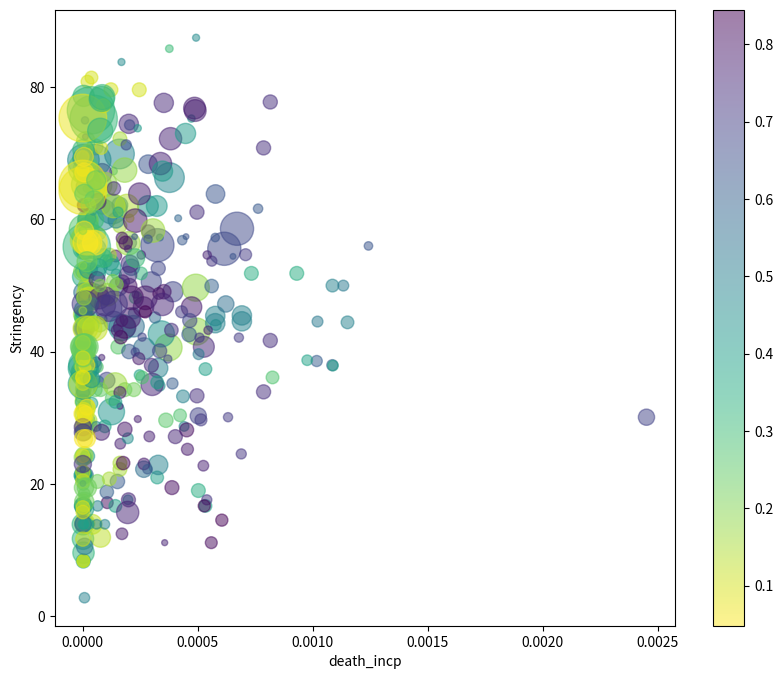

In [33]:
#########################
x='death_incp'
y='Stringency'
color='demo'
size='popu_display'
#########################
plot_scatter(gdf,x, y, color, size)

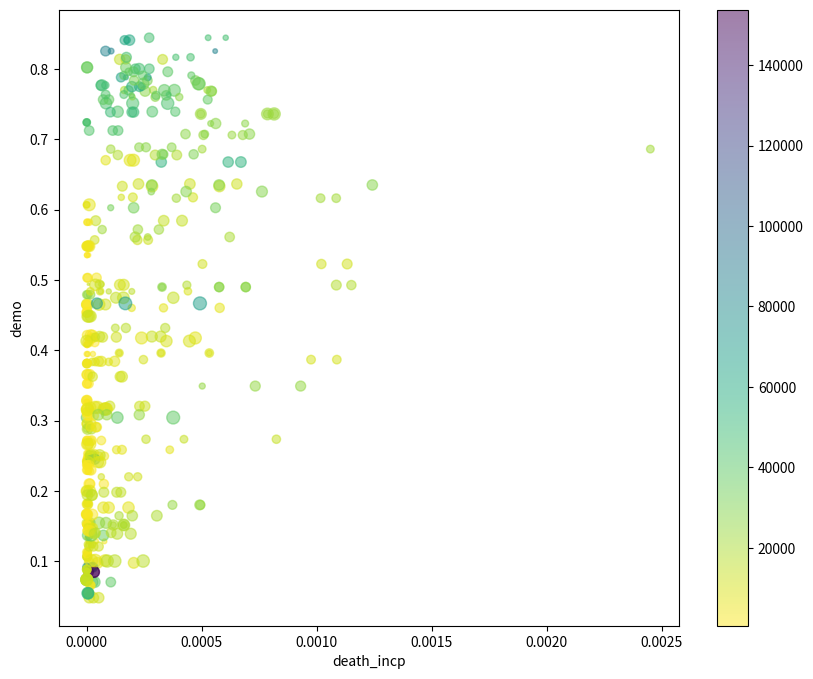

In [34]:
#########################
x='death_incp'
y='demo'
color='gdp_c'
size='Stringency'
#########################
plot_scatter(gdf,x, y, color, size)

## 直方圖

In [35]:
def plot_hist(df, variable):
    title=variable+'_histogram'
    plt.figure(figsize=(8,6))
    df[variable].hist(bins=20)
    plt.xlabel(variable)
    plt.ylabel('frequency')
    plt.title('Distribution of {variable}')
    plt.savefig(pth+ title+".png")
    plt.show()

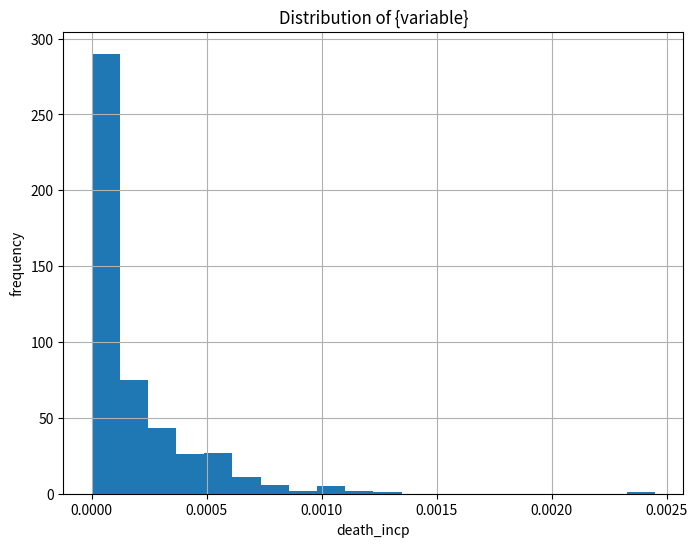

In [36]:
###########################
variable='death_incp'
############################
plot_hist(gdf, variable)

## heatmap 相關矩陣

In [37]:
## 相關矩陣
gdf.columns

Index(['iso_a3', 'Country', 'C1_combine', 'C2_combine', 'C3_combine',
       'C4_combine', 'C5_combine', 'C6_combine', 'C7_combine', 'C8_combine',
       'E1_combine', 'E2_combine', 'H1_combine', 'H2_combine', 'H3_combine',
       'H6_combine', 'H7_combine', 'H8_combine', 'V1_combine', 'V2_combine',
       'V3_combine', 'V4_combine', 'Cases', 'Deaths', 'Stringency', 'Govern',
       'Contain', 'Eco_Sup', 'area', 'cate', 'demo', 'eco_dev', 'edu', 'ferti',
       'gdp_c', 'life', 'popu', 'region', 'region2', 'delibdem', 'egaldem',
       'libdem', 'partipdem', 'death_p', 'case_p', 'case_incp', 'death_incp',
       'ym', 'continent', 'geometry', 'popu_display'],
      dtype='object')

In [38]:
def coorelation_matrix(df_corr, title):
    sns.set(rc={'figure.figsize':(24,12)})
    # 計算相關矩陣會跳過文字欄位
    sns.heatmap(df_corr.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
    plt.savefig(pth+title+".png")

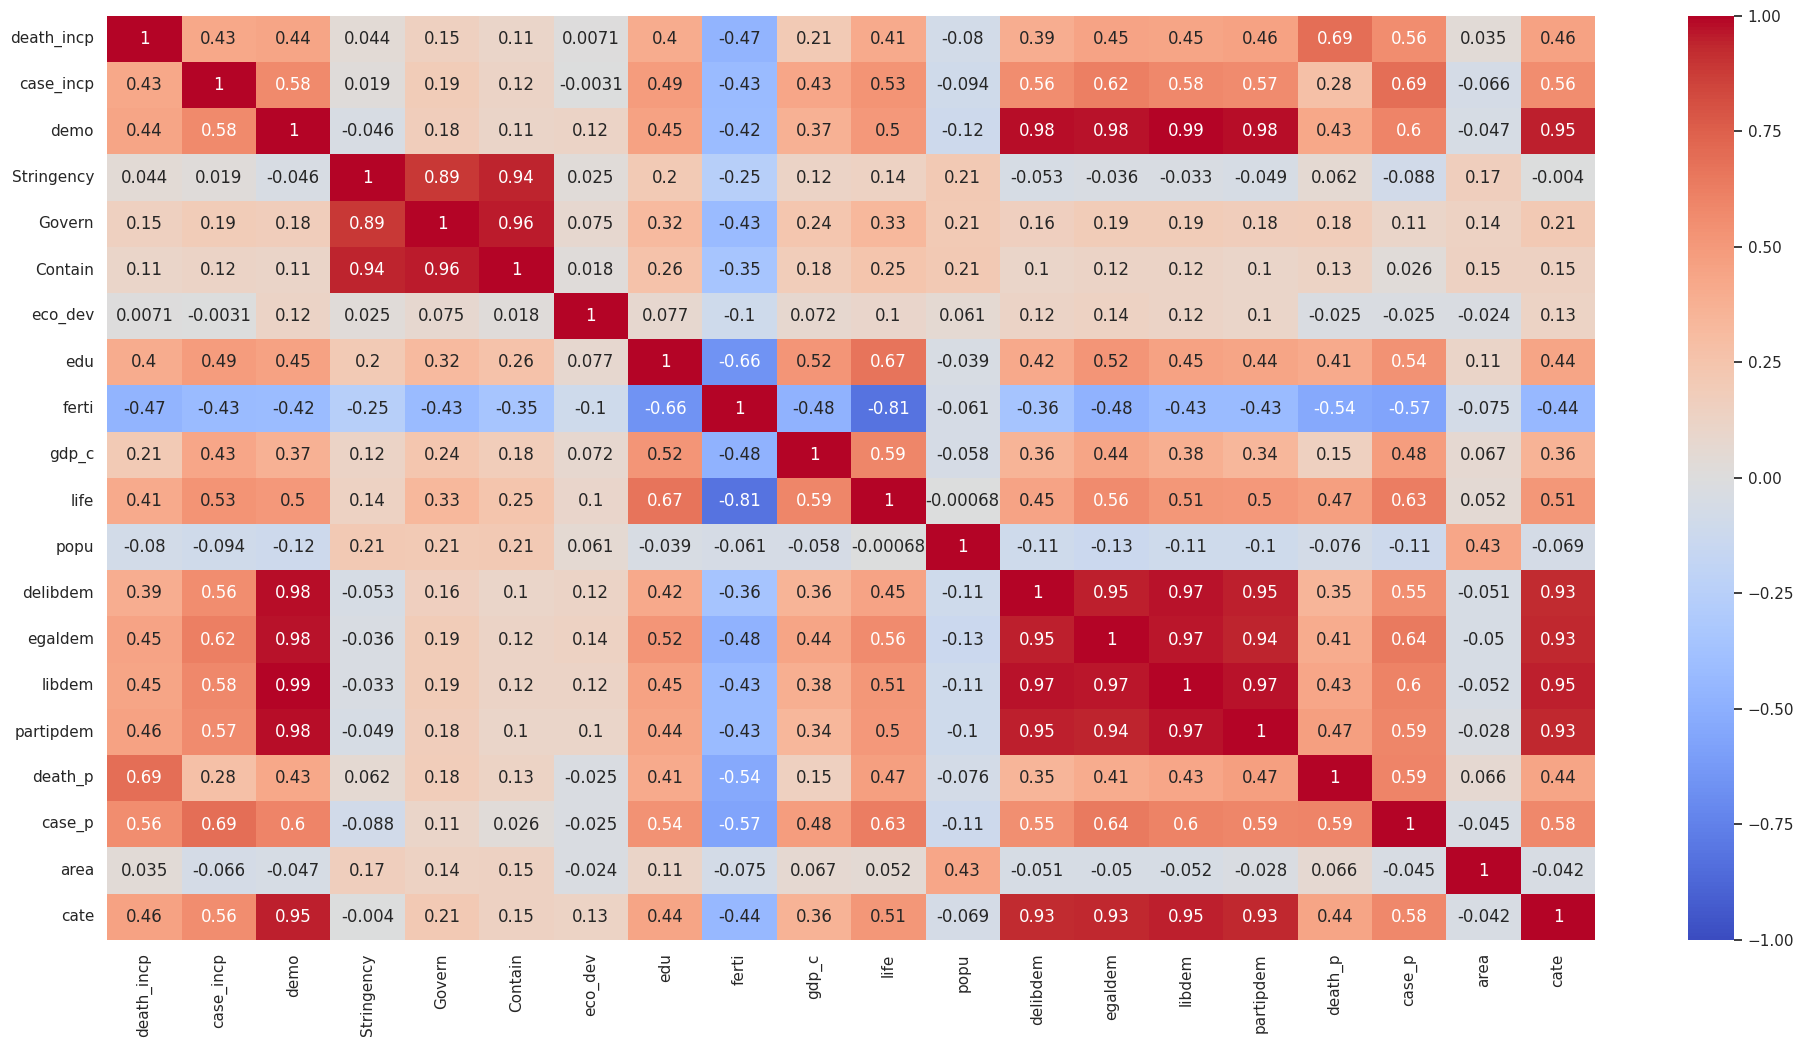

In [39]:
df_corr = gdf[[ 'death_incp', 'case_incp', 'demo','Stringency',
       'Govern', 'Contain',
       'eco_dev', 'edu', 'ferti', 'gdp_c', 'life', 'popu',
       'delibdem', 'egaldem',
       'libdem', 'partipdem',
       'death_p', 'case_p','area', 'cate']]

title='covid_coorelation_matrix'
coorelation_matrix(df_corr, title)

# 最小平方法迴歸 OLS

In [40]:
gdf.columns

Index(['iso_a3', 'Country', 'C1_combine', 'C2_combine', 'C3_combine',
       'C4_combine', 'C5_combine', 'C6_combine', 'C7_combine', 'C8_combine',
       'E1_combine', 'E2_combine', 'H1_combine', 'H2_combine', 'H3_combine',
       'H6_combine', 'H7_combine', 'H8_combine', 'V1_combine', 'V2_combine',
       'V3_combine', 'V4_combine', 'Cases', 'Deaths', 'Stringency', 'Govern',
       'Contain', 'Eco_Sup', 'area', 'cate', 'demo', 'eco_dev', 'edu', 'ferti',
       'gdp_c', 'life', 'popu', 'region', 'region2', 'delibdem', 'egaldem',
       'libdem', 'partipdem', 'death_p', 'case_p', 'case_incp', 'death_incp',
       'ym', 'continent', 'geometry', 'popu_display'],
      dtype='object')

## 調整依變數的尺度

In [41]:
gdf['death_incp']=gdf['death_incp']*1000

In [42]:
##################################################
dep='death_incp'
ind=['demo','gdp_c','edu','Stringency']
title='covid19'
##################################################
# 依變數
y=np.array(gdf[dep])
y.shape=(len(y),1)
# 自變數
X = []
for i in ind:
    X.append(np.array(gdf[i]))
X = np.array(X).T
# 迴歸建模
ols = OLS(y, X, name_y=dep, name_x=ind, name_ds=title, white_test=True)
# 輸出結果
print(ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     covid19
Weights matrix      :        None
Dependent Variable  :  death_incp                Number of Observations:         489
Mean dependent var  :      0.1720                Number of Variables   :           5
S.D. dependent var  :      0.2531                Degrees of Freedom    :         484
R-squared           :      0.2487
Adjusted R-squared  :      0.2425
Sum squared residual:     23.4879                F-statistic           :     40.0580
Sigma-square        :       0.049                Prob(F-statistic)     :   5.383e-29
S.E. of regression  :       0.220                Log likelihood        :      48.411
Sigma-square ML     :       0.048                Akaike info criterion :     -86.823
S.E of regression ML:      0.2192                Schwarz criterion     :     -65.861

------------------------------------------------------------

In [43]:
ols.betas
print(round(ols.t_stat[2][0],3))
print(round(ols.t_stat[2][1],3))
print(round(ols.r2,3))

-1.295
0.196
0.249


## 誤差的空間分布圖
* 空間隨嘰或空間聚集
* 誤差為負代表高估，誤差為正代表低估

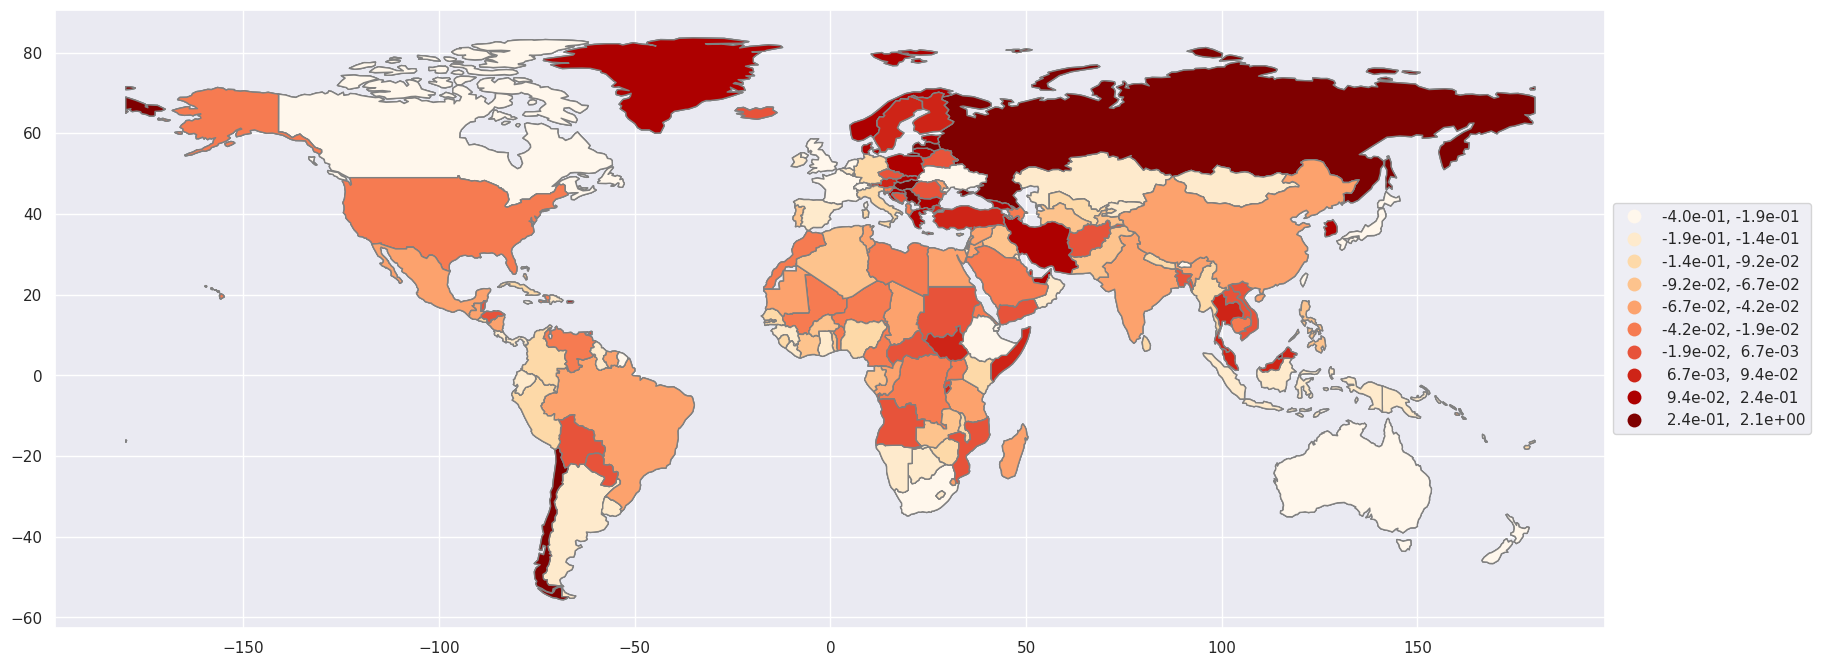

In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf['error']=ols.u
##############################
variable='error'
title='ols_error_2022'
##############################
plot_poly_map(gdf, variable, title)

## 誤差與預測值散佈圖
* 檢查是否是 i.i.d.
* 是否有異質？

<ipython-input-31-3c0028c4bba2>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_value, y_value, c=colors, s=sizes,alpha=0.5, cmap='viridis_r')


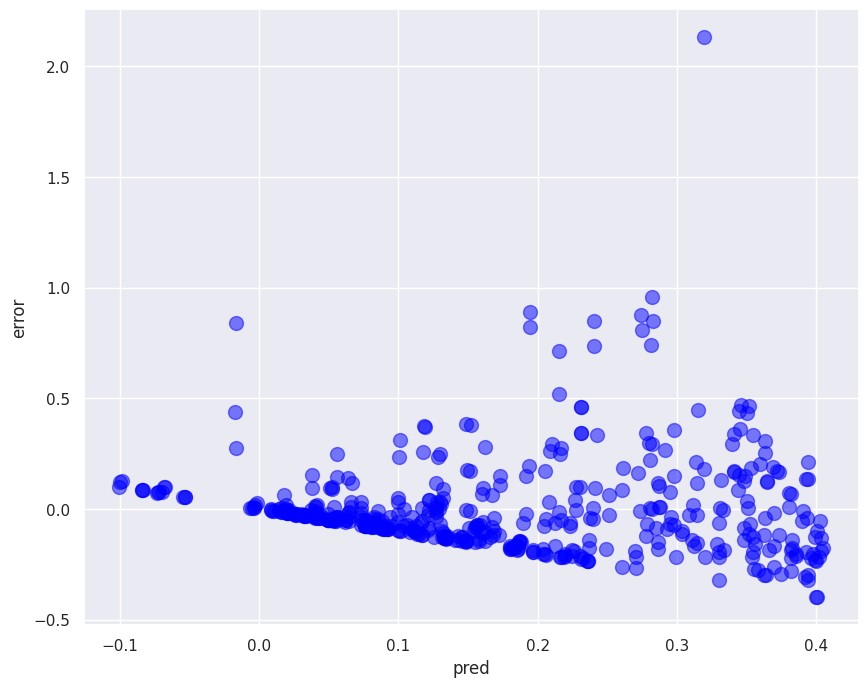

In [45]:
gdf['pred']=ols.predy
#########################
x='pred'
y='error'
color=''
size=100
#########################
plot_scatter(gdf,x, y, color, size)

## 誤差直方圖
* 檢查是否是常態分佈

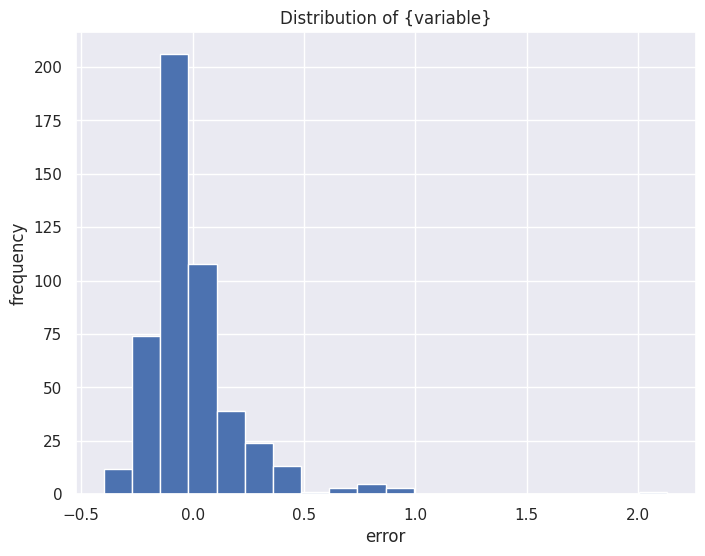

In [46]:
###########################
variable='error'
############################
plot_hist(gdf, variable)

## 怎麼看迴歸報表
* 自變數是什麼？ 依變數是什麼？
* 自變數的係數是正還是負? 有沒有顯著? t 檢定。
* 如何解釋係數?
* R^2 可解釋百分比是多少? F 檢定。
* 共線性指數
* 誤差常態檢定，是否拒絕虛無假設：誤差常態
* 空間異質檢定，是否拒絕虛無假設：同質
* 觀察值數目？
* 估計方法：最小平方法

# 逐步迴歸
* 變數逐一置入，觀察其變化。

In [47]:
##########################################
dep='death_incp'
ind=['demo']
title='covid19'
##########################################
# 依變數
y=np.array(gdf[dep])
y.shape=(len(y),1)
# 自變數
X = []
for i in ind:
    X.append(np.array(gdf[i]))
X = np.array(X).T
# 迴歸建模
ols = OLS(y, X, name_y=dep, name_x=ind, name_ds=title, white_test=True)
# 輸出結果
print(ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     covid19
Weights matrix      :        None
Dependent Variable  :  death_incp                Number of Observations:         489
Mean dependent var  :      0.1720                Number of Variables   :           2
S.D. dependent var  :      0.2531                Degrees of Freedom    :         487
R-squared           :      0.1962
Adjusted R-squared  :      0.1946
Sum squared residual:     25.1289                F-statistic           :    118.8915
Sigma-square        :       0.052                Prob(F-statistic)     :   6.429e-25
S.E. of regression  :       0.227                Log likelihood        :      31.899
Sigma-square ML     :       0.051                Akaike info criterion :     -59.797
S.E of regression ML:      0.2267                Schwarz criterion     :     -51.413

------------------------------------------------------------

In [48]:
##########################################
dep='death_incp'
ind=['demo','gdp_c']
title='covid19'
##########################################
# 依變數
y=np.array(gdf[dep])
y.shape=(len(y),1)
# 自變數
X = []
for i in ind:
    X.append(np.array(gdf[i]))
X = np.array(X).T
# 迴歸建模
ols = OLS(y, X, name_y=dep, name_x=ind, name_ds=title, white_test=True)
# 輸出結果
print(ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     covid19
Weights matrix      :        None
Dependent Variable  :  death_incp                Number of Observations:         489
Mean dependent var  :      0.1720                Number of Variables   :           3
S.D. dependent var  :      0.2531                Degrees of Freedom    :         486
R-squared           :      0.1986
Adjusted R-squared  :      0.1953
Sum squared residual:     25.0547                F-statistic           :     60.2199
Sigma-square        :       0.052                Prob(F-statistic)     :   4.317e-24
S.E. of regression  :       0.227                Log likelihood        :      32.622
Sigma-square ML     :       0.051                Akaike info criterion :     -59.245
S.E of regression ML:      0.2264                Schwarz criterion     :     -46.668

------------------------------------------------------------

In [49]:
##########################################
dep='death_incp'
ind=['demo','gdp_c','edu']
title='covid19'
##########################################
# 依變數
y=np.array(gdf[dep])
y.shape=(len(y),1)
# 自變數
X = []
for i in ind:
    X.append(np.array(gdf[i]))
X = np.array(X).T
# 迴歸建模
ols = OLS(y, X, name_y=dep, name_x=ind, name_ds=title, white_test=True)
# 輸出結果
print(ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     covid19
Weights matrix      :        None
Dependent Variable  :  death_incp                Number of Observations:         489
Mean dependent var  :      0.1720                Number of Variables   :           4
S.D. dependent var  :      0.2531                Degrees of Freedom    :         485
R-squared           :      0.2486
Adjusted R-squared  :      0.2440
Sum squared residual:     23.4914                F-statistic           :     53.4882
Sigma-square        :       0.048                Prob(F-statistic)     :   6.986e-30
S.E. of regression  :       0.220                Log likelihood        :      48.374
Sigma-square ML     :       0.048                Akaike info criterion :     -88.748
S.E of regression ML:      0.2192                Schwarz criterion     :     -71.979

------------------------------------------------------------

In [50]:
##########################################
dep='death_incp'
ind=['demo','gdp_c','edu','Stringency']
title='covid19'
##########################################
# 依變數
y=np.array(gdf[dep])
y.shape=(len(y),1)
# 自變數
X = []
for i in ind:
    X.append(np.array(gdf[i]))
X = np.array(X).T
# 迴歸建模
ols = OLS(y, X, name_y=dep, name_x=ind, name_ds=title, white_test=True)
# 輸出結果
print(ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     covid19
Weights matrix      :        None
Dependent Variable  :  death_incp                Number of Observations:         489
Mean dependent var  :      0.1720                Number of Variables   :           5
S.D. dependent var  :      0.2531                Degrees of Freedom    :         484
R-squared           :      0.2487
Adjusted R-squared  :      0.2425
Sum squared residual:     23.4879                F-statistic           :     40.0580
Sigma-square        :       0.049                Prob(F-statistic)     :   5.383e-29
S.E. of regression  :       0.220                Log likelihood        :      48.411
Sigma-square ML     :       0.048                Akaike info criterion :     -86.823
S.E of regression ML:      0.2192                Schwarz criterion     :     -65.861

------------------------------------------------------------

### 奇怪的現象：愈是民主、教育程度愈好的地方，疫情愈嚴重? 控制了政府的管制政策！這要怎麼解釋?
* 是不是有遺漏變數?

## 遺漏變數的影響
* 如果遺漏變數同時影響 Y 與 X
* 方向一致，則會產生正向加乘的效果
* 如果方向不一致，則會產生負向加乘的效果
* 例如
  * 冰琪琳銷售量與游泳意外的關係
  * 電視機銷售量與夀命的關係
  * 烤麵包機與生兒育女的關係

# 虛擬變數
* 0 與1 的二元變數，0 代表觀察組，1 代表對照組
* 觀察組會出現在迴歸方程式中，對照組不會。
* 觀察組的係數，觀察組與對照組之差。
* 地區虛擬變數，顯示疫情的空間異值性，但沒有提出解釋。

In [51]:
gdf.continent.value_counts()

continent
Africa           141
Asia             129
Europe           117
South America     78
Oceania           18
North America      6
Name: count, dtype: int64

In [52]:
gdf['Europe']=gdf.continent.apply(lambda x:1 if x=='Europe' else 0)
gdf['Asia']=gdf.continent.apply(lambda x:1 if x=='Asia' else 0)
gdf['Africa']=gdf.continent.apply(lambda x:1 if x=='Africa' else 0)
gdf['North America']=gdf.continent.apply(lambda x:1 if x=='North America' else 0)
gdf['South America']=gdf.continent.apply(lambda x:1 if x=='South America' else 0)
gdf['Caribbean']=gdf.continent.apply(lambda x:1 if x=='Caribbean' else 0)
gdf['Oceania']=gdf.continent.apply(lambda x:1 if x=='Oceania' else 0)

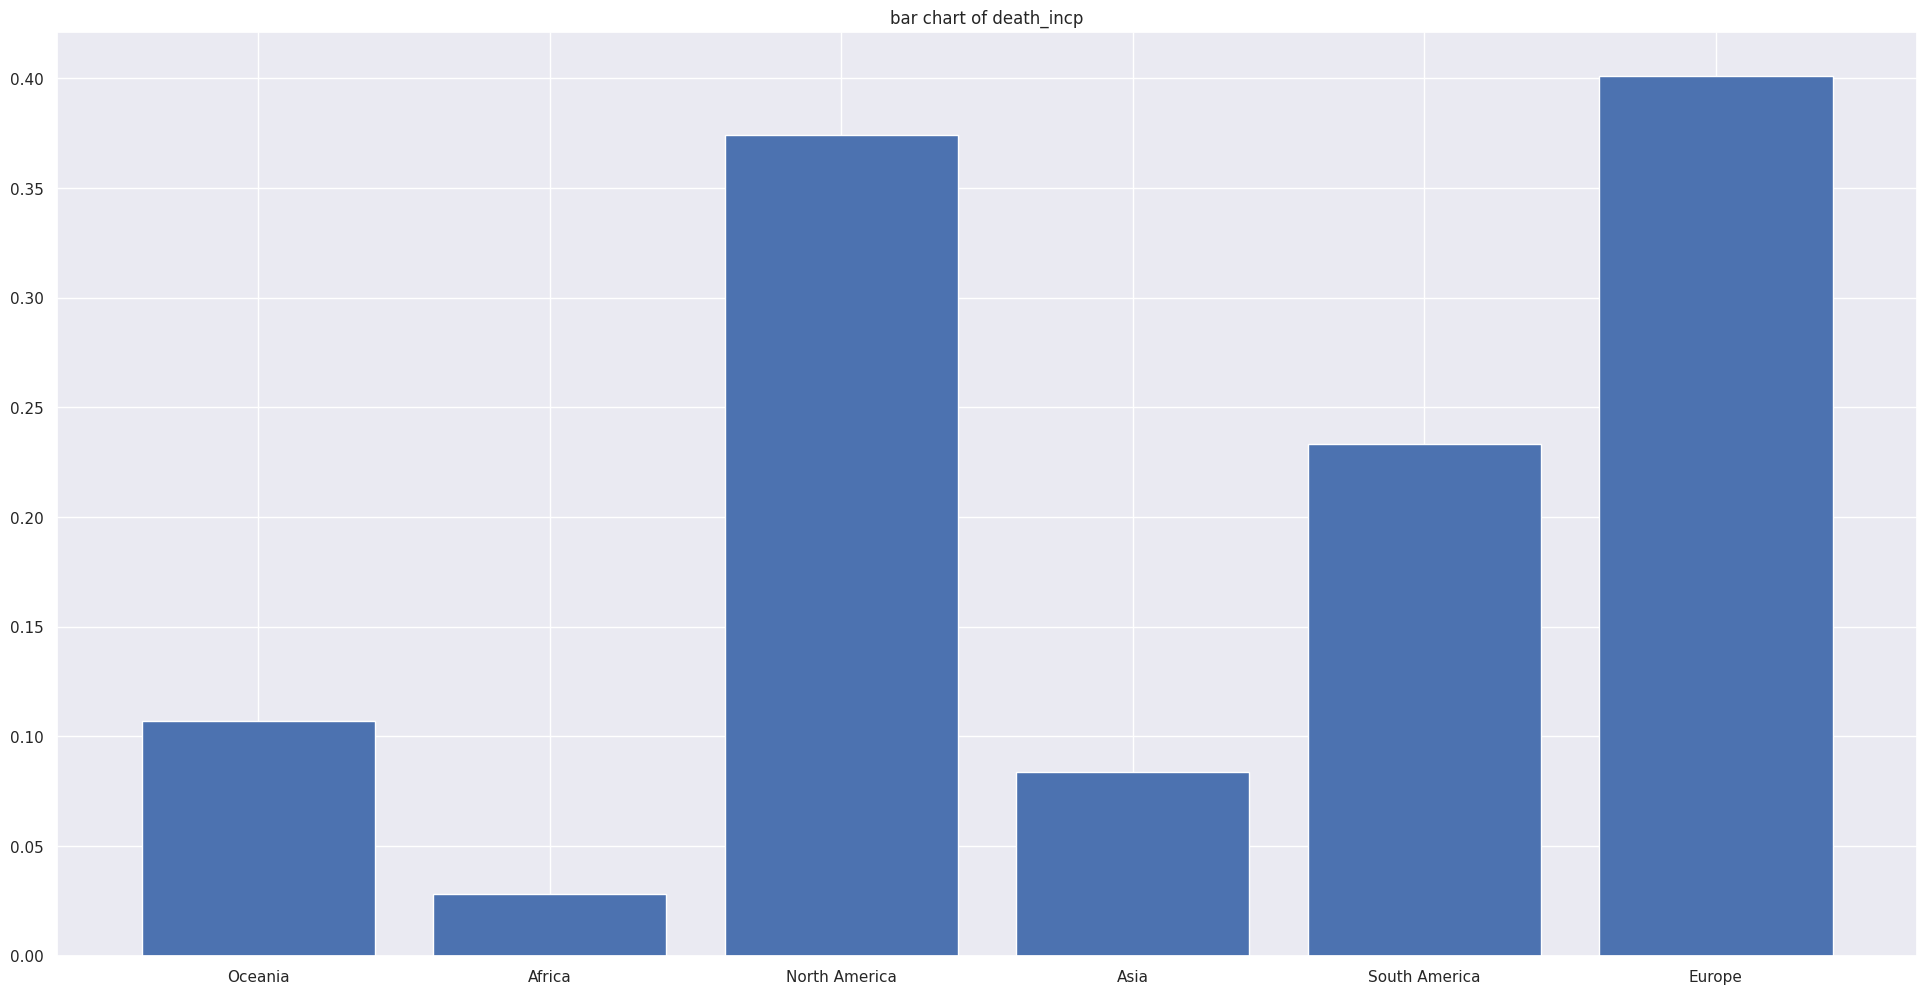

In [53]:
# geoupby 分群處理
variable='death_incp'
cat='continent'
sectors = gdf.groupby(cat)
category= gdf[cat].unique()

# 各群的比較
vari_mean=[]
for c in category:
    d=sectors.get_group(c)[variable].mean()
    vari_mean.append(d)
plt.bar(category, vari_mean)
plt.title('bar chart of '+variable)

plt.show()

## 七個類別六個虛擬變數
* 未出現者為對照組，其他為觀察組
* 常數項為對照組的平均值
* 觀察組的係數為各觀察組與對照組之差

In [54]:
##########################################
dep='death_incp'
ind=['Africa','North America','Asia','South America','Caribbean','Europe']
title='covid19'
##########################################
# 依變數
y=np.array(gdf[dep])
y.shape=(len(y),1)
# 自變數
X = []
for i in ind:
    X.append(np.array(gdf[i]))
X = np.array(X).T
# 迴歸建模
ols = OLS(y, X, name_y=dep, name_x=ind, name_ds=title, white_test=True)
# 輸出結果
print(ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     covid19
Weights matrix      :        None
Dependent Variable  :  death_incp                Number of Observations:         489
Mean dependent var  :      0.1720                Number of Variables   :           6
S.D. dependent var  :      0.2531                Degrees of Freedom    :         483
R-squared           :      0.3417
Adjusted R-squared  :      0.3348
Sum squared residual:     20.5823                F-statistic           :     50.1312
Sigma-square        :       0.043                Prob(F-statistic)     :   8.249e-42
S.E. of regression  :       0.206                Log likelihood        :      80.698
Sigma-square ML     :       0.042                Akaike info criterion :    -149.395
S.E of regression ML:      0.2052                Schwarz criterion     :    -124.241

------------------------------------------------------------

In [55]:
##########################################
dep='death_incp'
ind=['demo','gdp_c','edu','Stringency','Africa','North America','Asia','South America','Caribbean','Europe']
title='covid19'
##########################################
# 依變數
y=np.array(gdf[dep])
y.shape=(len(y),1)
# 自變數
X = []
for i in ind:
    X.append(np.array(gdf[i]))
X = np.array(X).T
# 迴歸建模
ols = OLS(y, X, name_y=dep, name_x=ind, name_ds=title, white_test=True)
# 輸出結果
print(ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     covid19
Weights matrix      :        None
Dependent Variable  :  death_incp                Number of Observations:         489
Mean dependent var  :      0.1720                Number of Variables   :          10
S.D. dependent var  :      0.2531                Degrees of Freedom    :         479
R-squared           :      0.3731
Adjusted R-squared  :      0.3613
Sum squared residual:     19.6007                F-statistic           :     31.6687
Sigma-square        :       0.041                Prob(F-statistic)     :   1.679e-43
S.E. of regression  :       0.202                Log likelihood        :      92.646
Sigma-square ML     :       0.040                Akaike info criterion :    -165.291
S.E of regression ML:      0.2002                Schwarz criterion     :    -123.368

------------------------------------------------------------

## 誤差的空間分布圖
* 空間隨嘰或空間聚集
* 高估或低估

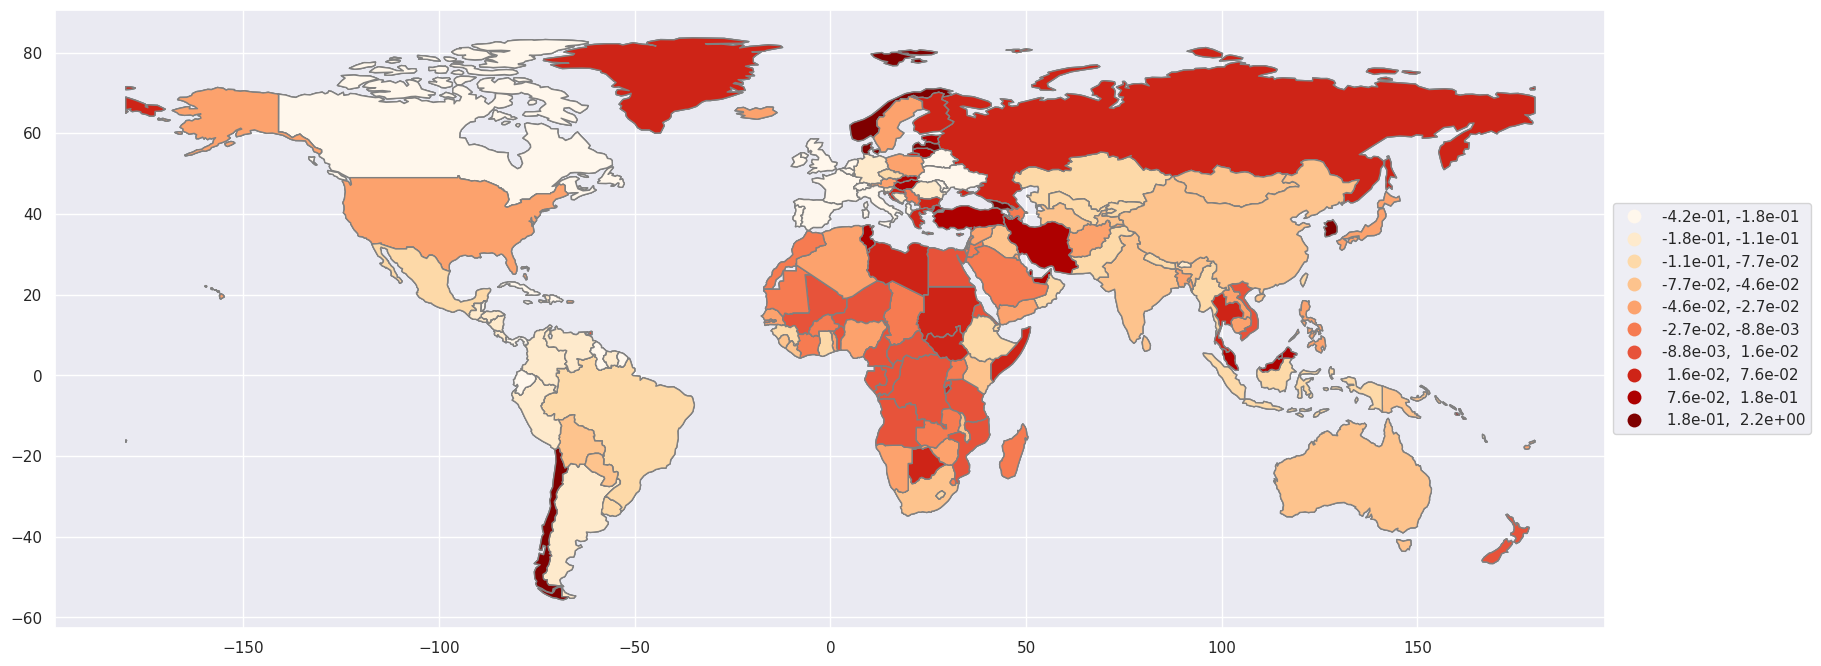

In [56]:
gdf['error']=ols.u
##############################
variable='error'
title='ols_error_2022'
##############################
plot_poly_map(gdf, variable, title)

## 誤差與預測值散佈圖
* 檢查是否是 i.i.d.

<ipython-input-31-3c0028c4bba2>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_value, y_value, c=colors, s=sizes,alpha=0.5, cmap='viridis_r')


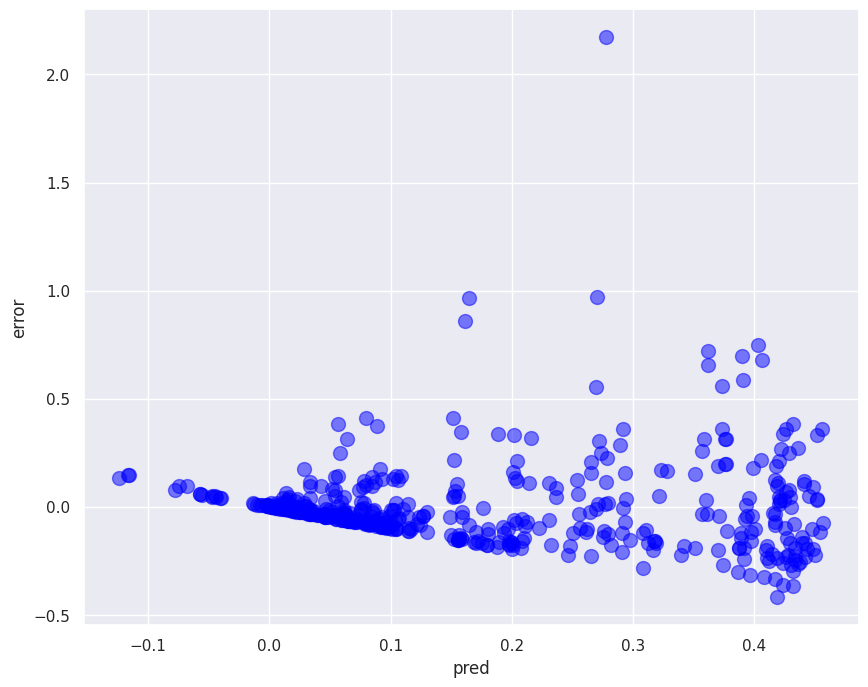

In [57]:
gdf['pred']=ols.predy
#########################
x='pred'
y='error'
color=''
size=100
#########################
plot_scatter(gdf,x, y, color, size)

# 交互作用
* 虛擬變數的係數代表觀察組與對照組的截距差
* 交互作用項的係數代表觀察組與對照組的斜率差
* X 對 Y 的影響會受到另一個變數的影響
* 觀察組的方程式為：
* 對照組的方程式為:
*

In [58]:
## 交互作用項
gdf['demo_gdp']=gdf['gdp_c']*gdf['demo']

In [59]:
##########################################
dep='death_incp'
ind=['demo','gdp_c','edu','Stringency','Africa','Asia','Europe','North America','demo_gdp']
title='covid19'
##########################################
# 依變數
y=np.array(gdf[dep])
y.shape=(len(y),1)
# 自變數
X = []
for i in ind:
    X.append(np.array(gdf[i]))
X = np.array(X).T
# 迴歸建模
ols = OLS(y, X, name_y=dep, name_x=ind, name_ds=title, white_test=True)
# 輸出結果
print(ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     covid19
Weights matrix      :        None
Dependent Variable  :  death_incp                Number of Observations:         489
Mean dependent var  :      0.1720                Number of Variables   :          10
S.D. dependent var  :      0.2531                Degrees of Freedom    :         479
R-squared           :      0.4034
Adjusted R-squared  :      0.3922
Sum squared residual:     18.6518                F-statistic           :     35.9876
Sigma-square        :       0.039                Prob(F-statistic)     :   1.517e-48
S.E. of regression  :       0.197                Log likelihood        :     104.779
Sigma-square ML     :       0.038                Akaike info criterion :    -189.557
S.E of regression ML:      0.1953                Schwarz criterion     :    -147.634

------------------------------------------------------------

## 如何解釋交互作用項：
* 民主對疫情有正向的影響，0.453432
* 但如果經濟條件比較好，此正向影響會降低，0.453432-0.0000108*gdp_c
* 注意我們依變數放大了 1000倍


## 虛擬變數與另一變數的交互作用
* 虛擬變數的係數為觀察組與對照組的截矩差
* 交互作用項的係數為觀察組與對照組的斜率差

In [60]:
## 交互作用項
gdf['demo_Europe']=gdf['demo']*gdf['Europe']
gdf['demo_N_America']=gdf['demo']*gdf['North America']

In [61]:
##########################################
dep='death_incp'
ind=['demo','gdp_c','edu','Stringency','Africa','Asia','Europe','North America','demo_Europe']
title='covid19'
##########################################
# 依變數
y=np.array(gdf[dep])
y.shape=(len(y),1)
# 自變數
X = []
for i in ind:
    X.append(np.array(gdf[i]))
X = np.array(X).T
# 迴歸建模
ols = OLS(y, X, name_y=dep, name_x=ind, name_ds=title, white_test=True)
# 輸出結果
print(ols.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     covid19
Weights matrix      :        None
Dependent Variable  :  death_incp                Number of Observations:         489
Mean dependent var  :      0.1720                Number of Variables   :          10
S.D. dependent var  :      0.2531                Degrees of Freedom    :         479
R-squared           :      0.3826
Adjusted R-squared  :      0.3710
Sum squared residual:     19.3011                F-statistic           :     32.9863
Sigma-square        :       0.040                Prob(F-statistic)     :   4.583e-45
S.E. of regression  :       0.201                Log likelihood        :      96.411
Sigma-square ML     :       0.039                Akaike info criterion :    -172.823
S.E of regression ML:      0.1987                Schwarz criterion     :    -130.899

------------------------------------------------------------

## 民主對疫情的影響，歐洲與非歐洲有別，
* 歐洲為 0.37 -0.42 斜率接近零
* 非歐洲為 0.37

# regression(gdf, dep, ind, title)

In [62]:
def regression(gdf, dep, ind, title):
    # 依變數
    y=np.array(gdf[dep])
    y.shape=(len(y),1)
    # 自變數
    X = []
    for i in ind:
       X.append(np.array(gdf[i]))
    X = np.array(X).T
    # 迴歸建模
    ols = OLS(y, X, name_y=dep, name_x=ind, name_ds=title, white_test=True)
    # 輸出結果
    print(ols.summary)

In [63]:
def plot_moran(w,y,title):
      wy = lps.weights.lag_spatial(w, y)
      # 係數與斜率
      b, a = np.polyfit(y, wy, 1)
      f, ax = plt.subplots(1, figsize=(9, 9))
      # 散佈圖
      plt.plot(y, wy, '.', color='firebrick')
      # 縱軸
      plt.vlines(y.mean(), wy.min(), wy.max(), linestyle='--')
      # 橫軸
      plt.hlines(wy.mean(), y.min(), y.max(), linestyle='--')
      # 趨勢線
      plt.plot(y, a + b*y, 'r')
      np.random.seed(12345)
      # moran's I
      moran=round(esda.moran.Moran(y, w).I,2)
      # p_value
      p_value=round(esda.moran.Moran(y, w).p_sim, 4)
      # title
      plt.title("Moran Scatterplot, moran's I="+ str(moran)+', p_value='+ str(p_value))
      plt.ylabel('wy')
      plt.xlabel('y')
      plt.savefig(pth+"plot/"+ title+".png")
      plt.show()

# The End